In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    path = []
    for filename in filenames:
        path.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
## Load the dataset and visulaize first 5 rows
data = pd.read_csv(path[0])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
## Shape of this dataset
data.shape

(7043, 21)

In [4]:
## Info about columns and their types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
## The total charges column in object it should be numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(f"Data type of Total Charges column is : {data['TotalCharges'].dtype}")

Data type of Total Charges column is : float64


In [6]:
## Lets check for any null values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### OOww Total Charges column contains some null values, what to be done, lets drop them
##### because they are very less in number as compared to data points we have

In [7]:
## incplace = True (is done to make changes in original dataset rather than returning a new object)
data.dropna(inplace=True)

In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Now we don't have any missing values 

#### Lets check whether our dataset is balanced according to our target variable (Churn)

<Axes: xlabel='Churn', ylabel='count'>

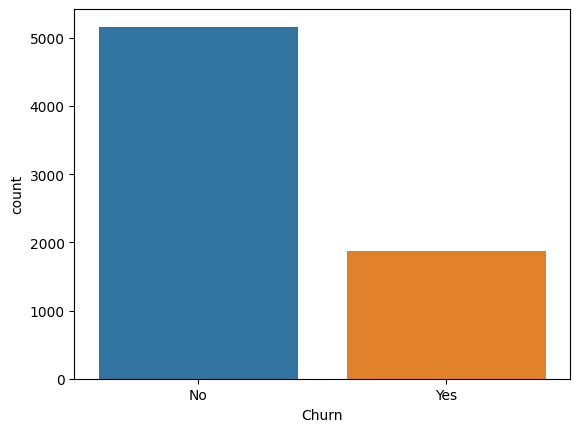

In [9]:
import seaborn as sns
sns.countplot(data, x='Churn')

#### Ufff, we can see that Customers that didn't Churned are much greater than customers that churned (Imbalanced dataset)
* #### while sampling we need to care about doing stratified sampling so that in both training and testing our predicted classes should be in equal proportion

In [10]:
## lets first slit this data into training and testing set so that we can deal with data snooping Bias
X = data.drop(columns=['Churn', 'customerID'])
y = data['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of X_train : (5625, 19)
Shape of y_train : (5625,)
Shape of X_test : (1407, 19)
Shape of y_test : (1407,)


In [11]:
## lets get the list of categorical and numerical columns
cat_columns = X_train.select_dtypes(include='object').columns
num_columns = X_train.select_dtypes(exclude='object').columns

print(f"Categorical columns : {cat_columns}")
print(f"Numerical columns : {num_columns}")

Categorical columns : Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Numerical columns : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


# Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
## checking the gender distribution how many males and feamales do we have
X_train['gender'].value_counts()

gender
Male      2823
Female    2802
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

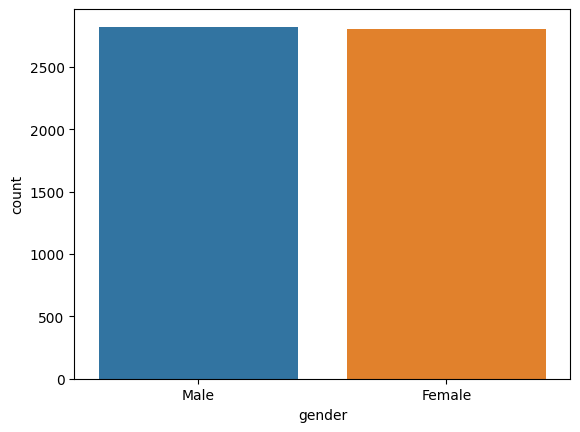

In [14]:
sns.countplot(X_train, x='gender')

* #### Checking the phone services distribution 

In [15]:
X_train['PhoneService'].value_counts()

PhoneService
Yes    5080
No      545
Name: count, dtype: int64

<Axes: xlabel='PhoneService', ylabel='count'>

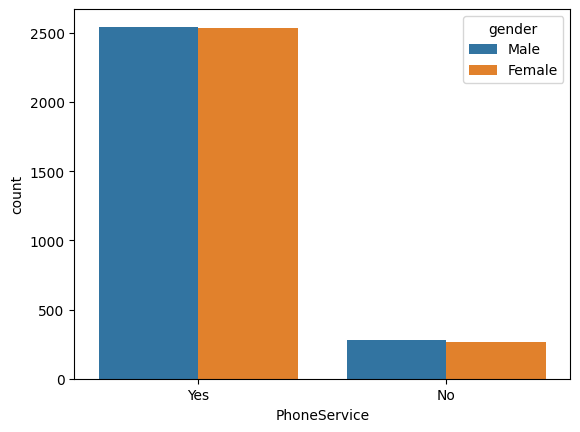

In [16]:
sns.countplot(X_train, x='PhoneService', hue='gender')

* #### Checking the Payment method distrubution


In [17]:
X_train['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             1907
Mailed check                 1268
Bank transfer (automatic)    1235
Credit card (automatic)      1215
Name: count, dtype: int64

<Axes: xlabel='PaymentMethod', ylabel='count'>

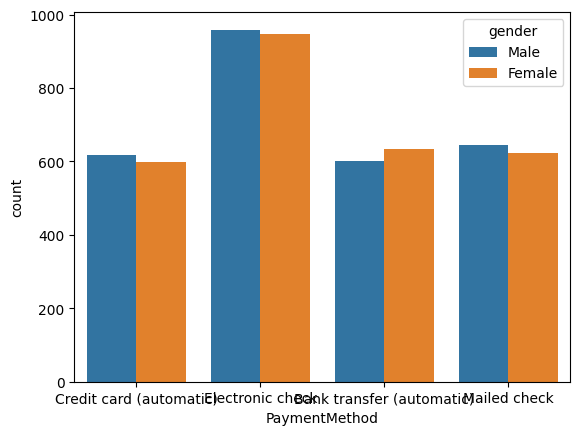

In [18]:
sns.countplot(X_train, x='PaymentMethod', hue='gender')

#### Payment methods are nearly same still most of people prefer electronic check

<Axes: xlabel='Churn', ylabel='count'>

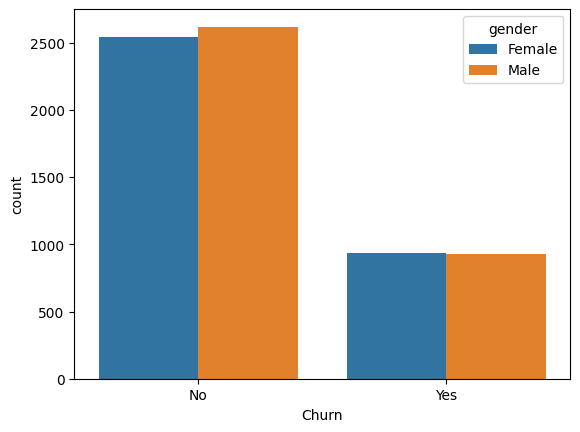

In [19]:
## lets see if the churn data is balanced or not
sns.countplot(data, x='Churn', hue='gender')

### Hmmm... Data is quiet Imbalanced
As amount of churned customers is quite less as compred to customers not churned

In [20]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75
7003,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
3355,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65
4494,Male,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05
3541,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75


<Axes: xlabel='Partner', ylabel='count'>

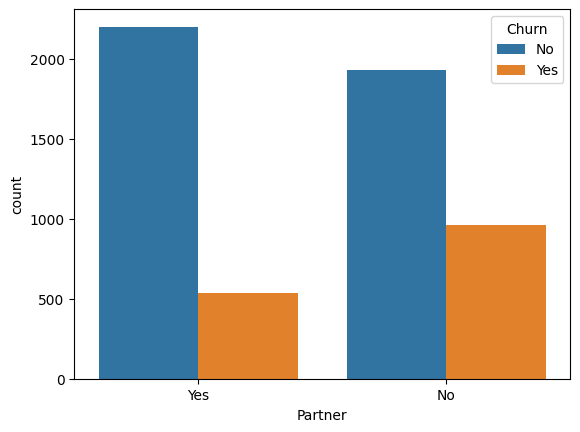

In [21]:
## Having a dependent or partner would affect Churn or not?
sns.countplot(X_train, x='Partner', hue=y_train)

#### People not having partners are likely to Churn

<Axes: xlabel='Dependents', ylabel='count'>

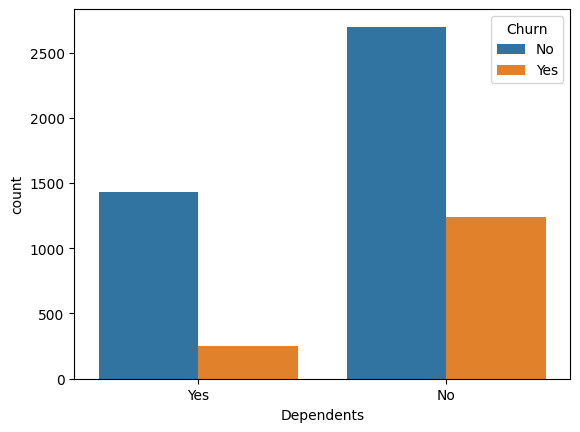

In [22]:
sns.countplot(X_train, x='Dependents', hue=y_train)

#### People with No dependents are more likely to churn

In [23]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75
7003,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
3355,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65
4494,Male,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05
3541,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75


In [24]:
## Lets take the count of senior citizens 
X_train['SeniorCitizen'].value_counts()

SeniorCitizen
0    4715
1     910
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

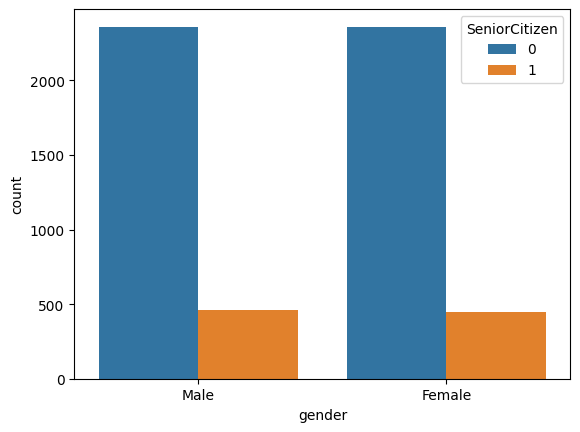

In [25]:
sns.countplot(X_train, x='gender', hue='SeniorCitizen')

#### Equal males and feamles for Senior citizens too

<Axes: xlabel='Churn', ylabel='count'>

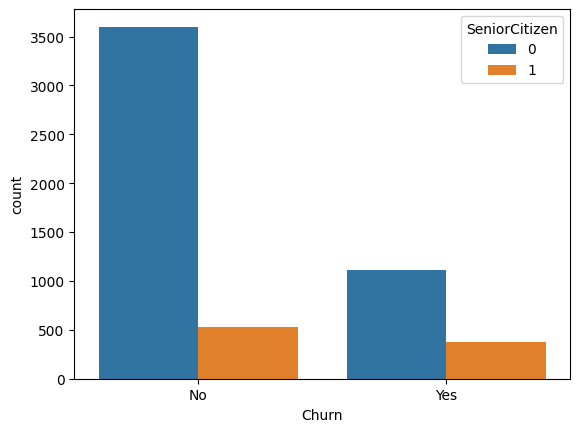

In [26]:
sns.countplot(X_train, x=y_train, hue='SeniorCitizen')

#### Senior Citizens are more likely to Churn

<Axes: xlabel='PhoneService', ylabel='count'>

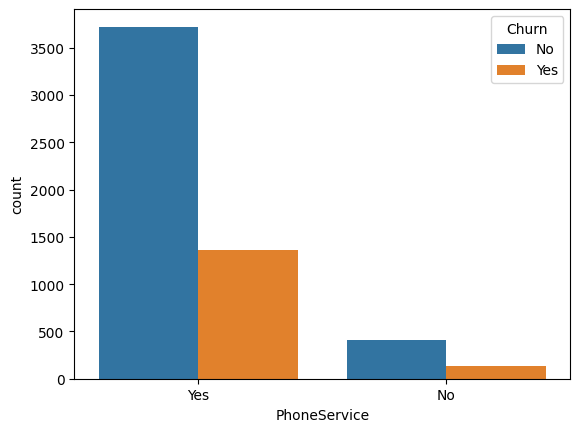

In [27]:
sns.countplot(X_train, x='PhoneService', hue=y_train)

#### Most of the customers who use Phone Services Churn

<Axes: xlabel='MultipleLines', ylabel='count'>

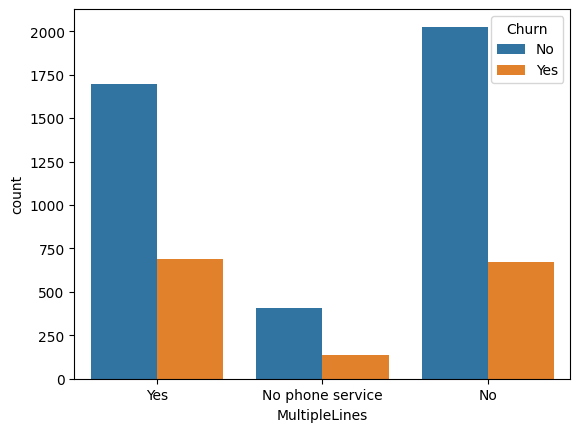

In [28]:
sns.countplot(X_train, x='MultipleLines', hue=y_train)

In [29]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75
7003,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
3355,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65
4494,Male,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05
3541,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75


<Axes: xlabel='InternetService', ylabel='count'>

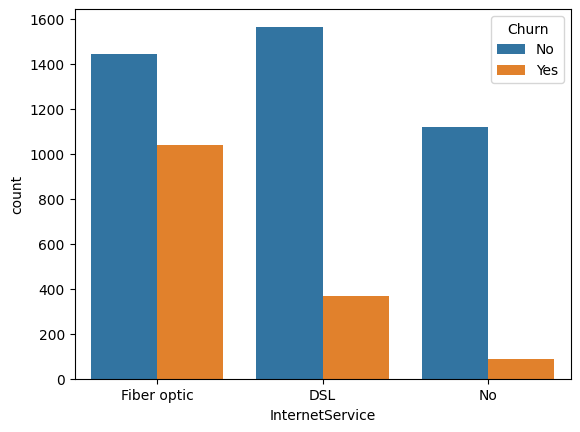

In [30]:
sns.countplot(X_train, x='InternetService', hue=y_train)

#### OOOOOO!!!! Most of the people who churned had used Fiber Optic

<Axes: xlabel='OnlineSecurity', ylabel='count'>

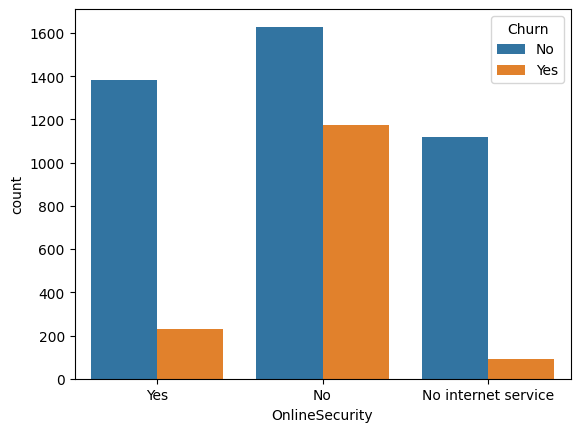

In [31]:
sns.countplot(X_train, x='OnlineSecurity', hue=y_train)

#### Wooa Most of the customers who churned are not using online security

<Axes: xlabel='OnlineBackup', ylabel='count'>

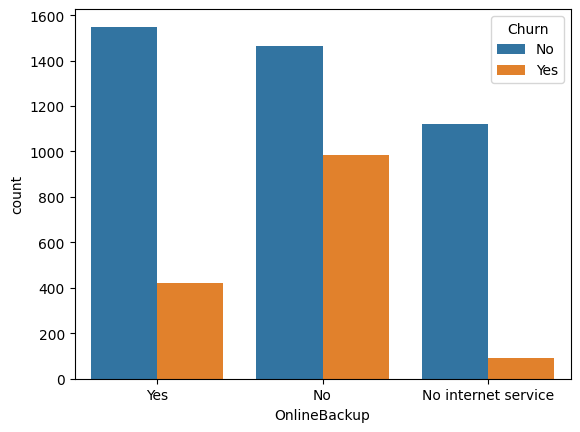

In [32]:
sns.countplot(X_train, x='OnlineBackup', hue=y_train)

#### People who are not using online backup are likely to Churn

In [33]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75
7003,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
3355,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65
4494,Male,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05
3541,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75


<Axes: xlabel='DeviceProtection', ylabel='count'>

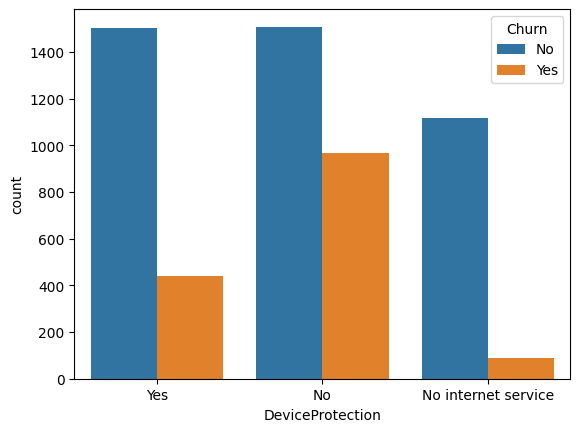

In [34]:
sns.countplot(X_train, x='DeviceProtection', hue=y_train)

#### People not having device peotection are likely to leave

<Axes: xlabel='TechSupport', ylabel='count'>

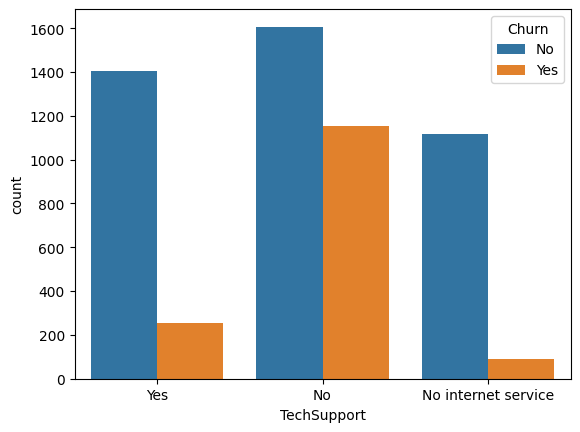

In [35]:
sns.countplot(X_train, x='TechSupport', hue=y_train)

#### Customers not having tech support are likely to leave

<Axes: xlabel='StreamingTV', ylabel='count'>

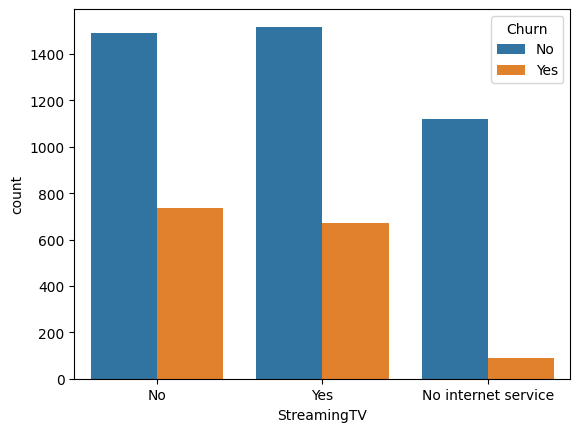

In [36]:
sns.countplot(X_train, x='StreamingTV', hue=y_train)

<Axes: xlabel='StreamingMovies', ylabel='count'>

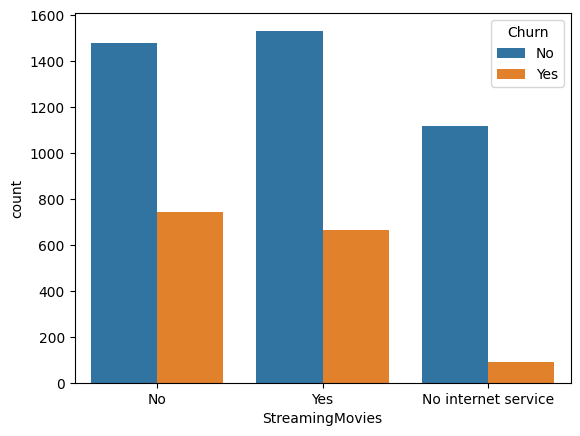

In [37]:
sns.countplot(X_train, x='StreamingMovies', hue=y_train)

<Axes: xlabel='PaperlessBilling', ylabel='count'>

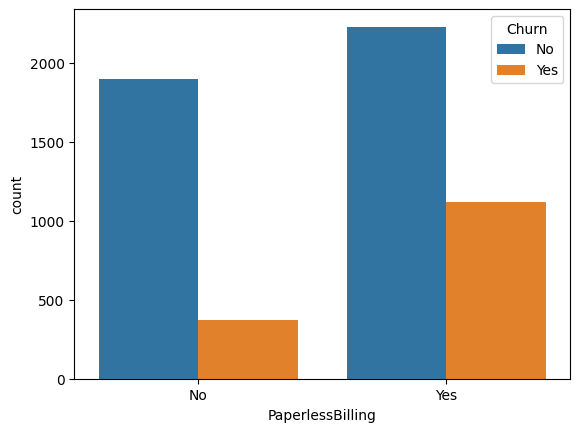

In [38]:
sns.countplot(X_train, x='PaperlessBilling', hue=y_train)

#### People using Paperless Billings are more likely to Churn

<Axes: xlabel='PaymentMethod', ylabel='count'>

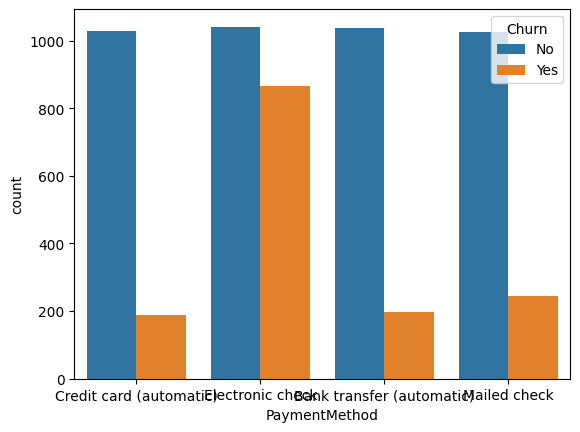

In [39]:
sns.countplot(X_train, x='PaymentMethod', hue=y_train)

#### People using Electronic Check are more likely to Churn

### Now lets use Distplots for the continuous numerical columns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

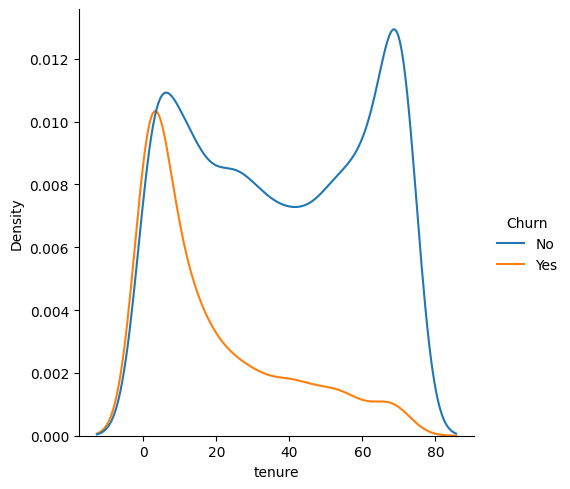

In [40]:
sns.displot(data=X_train, x='tenure', kind='kde', hue=y_train)

#### People with lower tenure are more likely to Churn

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

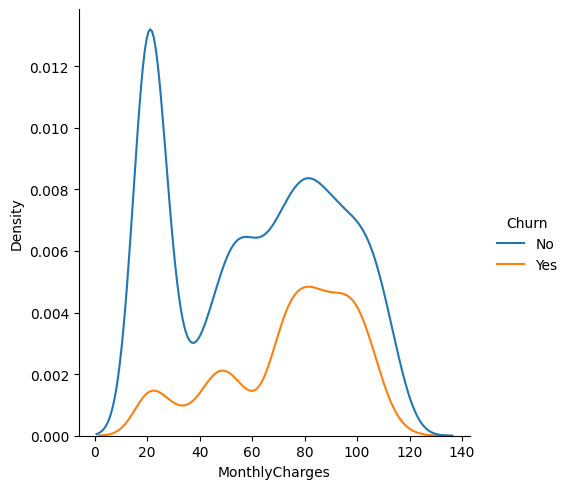

In [41]:
sns.displot(X_train, x='MonthlyCharges', kind='kde', hue=y_train)

#### People with High montly Charges are more likely to Churn

#### Total Charges column datatype is 'object' inspite of containing integer values, we need to re-convert in to int

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

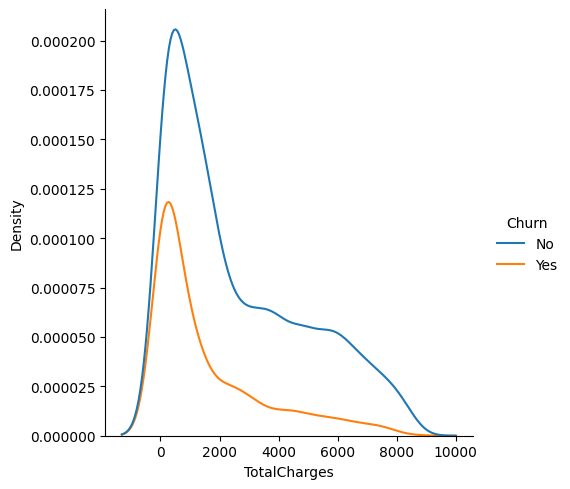

In [42]:
sns.displot(X_train, x='TotalCharges', kind='kde', hue=y_train)

#### Customers with low total Charges are Churning, this can be because they are rarely using services within year, so they prefer to shift

<Axes: xlabel='Churn', ylabel='tenure'>

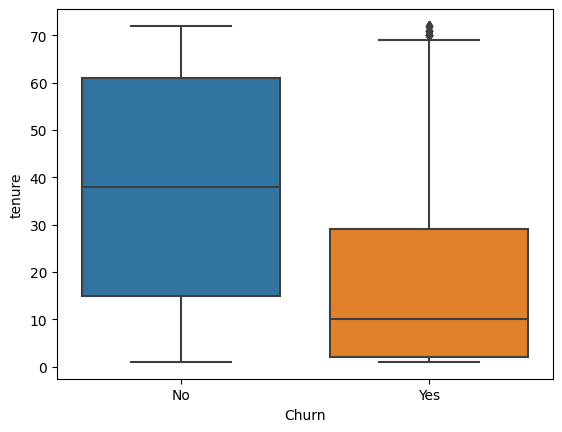

In [43]:
## Lets make a boxplot of Churn and tenure
sns.boxplot(data=X_train, y='tenure',x=y_train)

#### Clearly see that People having low tenure are likely to Churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

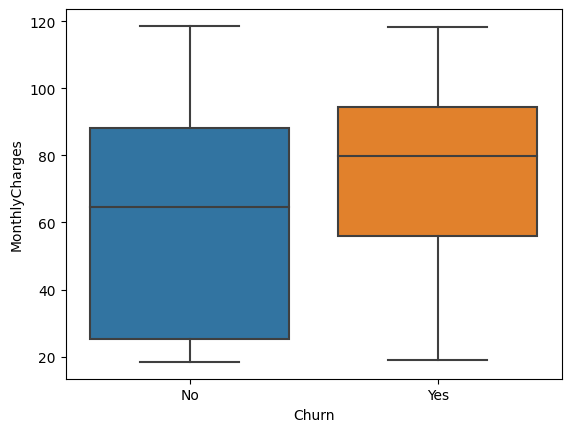

In [44]:
sns.boxplot(data=X_train, y='MonthlyCharges', x=y_train)

In [45]:
## mapping the senior citizen feature to 0->No and 1->Yes
X_train['SeniorCitizen'] = X_train['SeniorCitizen'].map({0 : "No", 1 : "Yes"})
X_test['SeniorCitizen'] = X_test['SeniorCitizen'].map({0 : "No", 1 : "Yes"})
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,No,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75
7003,Male,No,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
3355,Female,No,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65
4494,Male,No,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05
3541,Female,No,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 1413 to 1505
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   object 
 1   SeniorCitizen     5625 non-null   object 
 2   Partner           5625 non-null   object 
 3   Dependents        5625 non-null   object 
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   object 
 6   MultipleLines     5625 non-null   object 
 7   InternetService   5625 non-null   object 
 8   OnlineSecurity    5625 non-null   object 
 9   OnlineBackup      5625 non-null   object 
 10  DeviceProtection  5625 non-null   object 
 11  TechSupport       5625 non-null   object 
 12  StreamingTV       5625 non-null   object 
 13  StreamingMovies   5625 non-null   object 
 14  Contract          5625 non-null   object 
 15  PaperlessBilling  5625 non-null   object 
 16  PaymentMethod     5625 non-null   object 
 1

In [47]:
## categorical_columns
cat_cols = X_train.select_dtypes(include='object').columns
print(cat_cols)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [48]:
## converting object columns to int using label encoder

from sklearn.preprocessing import LabelEncoder

In [49]:
## for changing y_test into numerical encodings
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)
y_test = le_y.transform(y_test)

In [50]:
def change_to_int(column):
    if column.dtype == 'object':
        c_name = column.name
        le = LabelEncoder()
        column = le.fit_transform(column)
        X_test[c_name] = le.transform(X_test[c_name])
    return column

In [51]:
X_train = X_train.apply(lambda x: change_to_int(x))
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,1,0,1,1,65,1,2,1,2,2,2,2,0,0,2,0,1,94.55,6078.75
7003,1,0,0,0,26,0,1,0,0,0,2,2,0,0,0,0,2,35.75,1022.50
3355,0,0,1,0,68,1,2,1,0,2,2,2,0,0,2,0,1,90.20,6297.65
4494,1,0,0,0,3,1,0,1,0,2,0,0,0,2,0,0,2,84.30,235.05
3541,0,0,1,0,49,0,1,0,2,0,0,0,2,0,0,0,0,40.65,2070.75


#### Yo now we converted all categoricals into numericals

In [52]:
## getting the correlation matrix
X_test.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.033382,-0.020060,0.032393,0.023211,-0.016134,-0.025921,0.024396,0.016898,-0.017138,-0.008360,0.023072,0.013786,0.011074,0.025599,0.015580,0.030861,-0.049705,-0.013029
SeniorCitizen,-0.033382,1.000000,0.008972,-0.202854,0.022508,0.027704,0.165332,-0.041251,-0.144526,0.025990,-0.014783,-0.176657,-0.031050,0.049493,-0.172690,0.162925,-0.054678,0.244672,0.124945
Partner,-0.020060,0.008972,1.000000,0.450372,0.382196,0.054310,0.113595,-0.004566,0.123337,0.164274,0.175363,0.144119,0.131675,0.141736,0.309383,-0.027714,-0.130402,0.083977,0.319923
Dependents,0.032393,-0.202854,0.450372,1.000000,0.172935,0.014419,-0.044799,0.050530,0.178684,0.098401,0.080572,0.174987,0.048022,0.015503,0.254728,-0.097981,-0.055339,-0.111541,0.075798
tenure,0.023211,0.022508,0.382196,0.172935,1.000000,-0.000187,0.333749,-0.049623,0.364039,0.403742,0.341928,0.356645,0.305202,0.311133,0.681945,-0.006065,-0.383907,0.232051,0.820603
PhoneService,-0.016134,0.027704,0.054310,0.014419,-0.000187,1.000000,-0.026386,0.386302,-0.031283,0.041665,0.024506,-0.075948,0.067832,0.056889,-0.012894,0.071347,-0.004564,0.245334,0.104376
MultipleLines,-0.025921,0.165332,0.113595,-0.044799,0.333749,-0.026386,1.000000,-0.099175,0.001321,0.154480,0.113622,0.018164,0.171114,0.192355,0.091895,0.221792,-0.167922,0.429797,0.453550
InternetService,0.024396,-0.041251,-0.004566,0.050530,-0.049623,0.386302,-0.099175,1.000000,-0.028404,0.067495,0.039657,-0.031560,0.098089,0.096965,0.089211,-0.165289,0.096648,-0.333915,-0.199882
OnlineSecurity,0.016898,-0.144526,0.123337,0.178684,0.364039,-0.031283,0.001321,-0.028404,1.000000,0.203495,0.199124,0.319906,0.099251,0.067875,0.385079,-0.131868,-0.119955,-0.047646,0.290083
OnlineBackup,-0.017138,0.025990,0.164274,0.098401,0.403742,0.041665,0.154480,0.067495,0.203495,1.000000,0.185567,0.221420,0.218647,0.210607,0.294741,0.003058,-0.122460,0.137248,0.418059


In [53]:
X_train['tenure'].dtype

dtype('int64')

In [54]:
X_train['tenure'].isna().sum()

0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


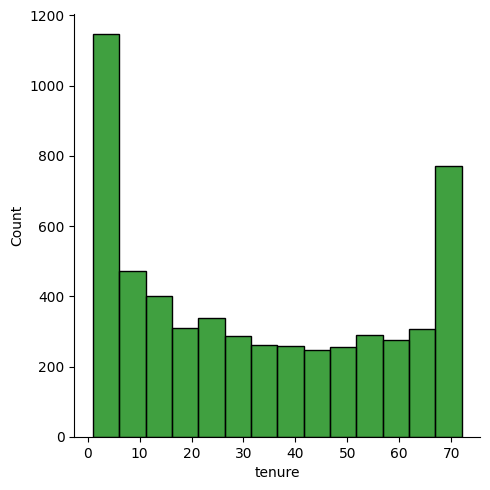

In [55]:
## we have 3 numerical columns so need to cehck thier distribution also
## Distribution of Tenure
sns.displot(X_train['tenure'], color='green')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


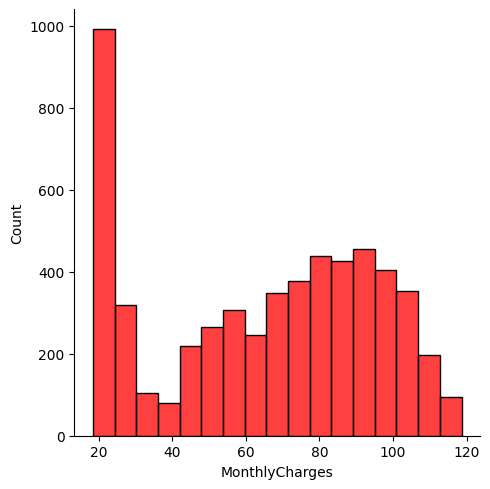

In [56]:
## Distribution of MonthlyCharges
sns.displot(X_train['MonthlyCharges'], color='red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


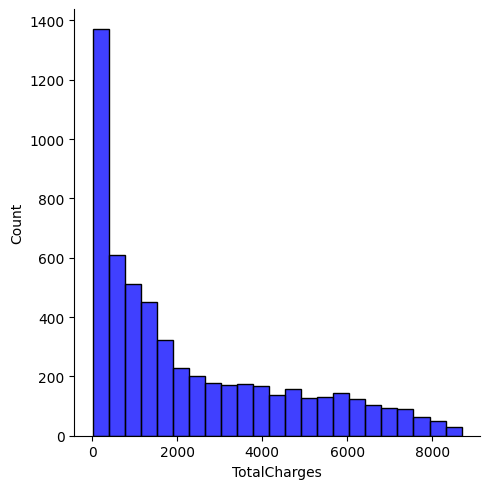

In [57]:
## Distribution of Total Charges
sns.displot(X_train['TotalCharges'], color='blue')

## Now we need to standardize these numerical columns

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
columns = ['tenure', 'TotalCharges', 'MonthlyCharges']

for col in columns:
    sc = StandardScaler()
    
    X_train[col] = sc.fit_transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = sc.transform(X_test[col].values.reshape(-1, 1))

In [60]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
974,0,0,1,1,1.077320,1,0,0,0,2,0,2,2,2,2,1,1,0.363738,0.984674
619,0,0,0,0,-1.041649,1,2,1,0,2,0,0,0,0,0,1,0,0.450100,-0.781798
4289,0,0,0,0,0.873573,1,0,2,1,1,1,1,1,1,2,0,3,-1.491376,-0.537223
3721,0,0,0,0,-1.245396,1,0,2,1,1,1,1,1,1,0,0,3,-1.473107,-0.994619
4533,0,0,1,0,1.566313,1,2,1,0,2,2,0,2,2,2,1,0,1.333645,2.308692


### So the values are now standardized

## Now comes Model Building Part and evaluation

#### RANDOM FOREST

In [61]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_random_forest = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_random_forest.fit(X_train, y_train)

# Make predictions
prediction_test = model_random_forest.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7889125799573561


### But do you think simply calculating accuarcy score is a good way to check how well model is performing

* ### we use confusion metrics in this case

In [62]:
cnf = metrics.confusion_matrix(y_test, prediction_test)
print(cnf)

[[939  94]
 [203 171]]


Text(0.5, 1.0, 'Confusion matrix for Random forest')

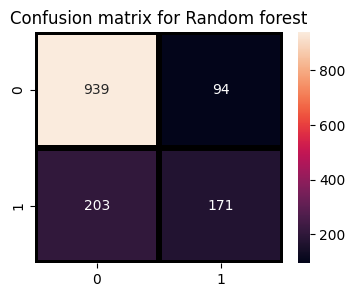

In [63]:
## lets visulaize it using a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cnf, annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Confusion matrix for Random forest")

Score : 0.8347953367741535


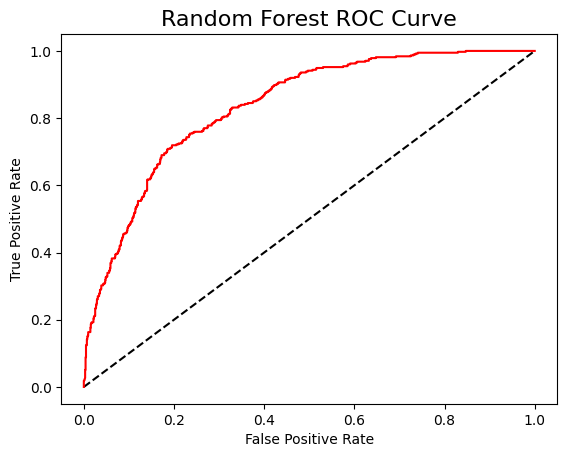

In [64]:
## Lets build ROC curve for this
y_pred_prob = model_random_forest.predict_proba(X_test)[:,1] ## predicts probability of both calsses and positive one
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
score = metrics.roc_auc_score(y_test, y_pred_prob)
print(f"Score : {score}")
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

#### LOGISTIC REGRESSION

In [65]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
predictions = model_lg.predict(X_test)

print(f"Accuracy for logistic regression model is : {metrics.accuracy_score(y_test, predictions)}")

Accuracy for logistic regression model is : 0.7931769722814499


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

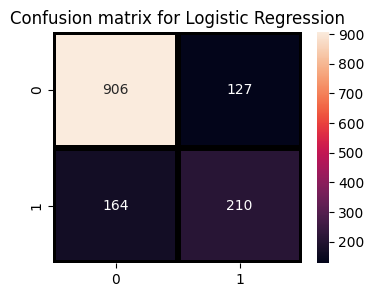

In [66]:
## Confusion matric for logistic regression
cnf = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cnf, annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Confusion matrix for Logistic Regression")

Score : 0.8344588473425101


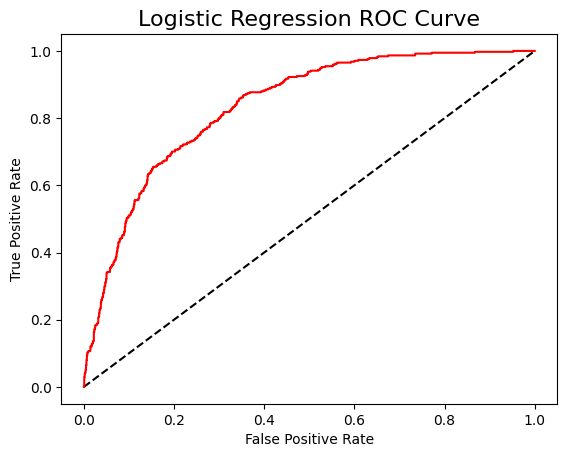

In [67]:
## Lets build ROC curve for Logistic Regression
y_pred_prob = model_lg.predict_proba(X_test)[:,1] ## predicts probability of both calsses and positive one
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
score = metrics.roc_auc_score(y_test, y_pred_prob)
print(f"Score : {score}")
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

## XGBOOST

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print(f"Accuracy score for gradient boosting is : {metrics.accuracy_score(y_test, predictions)}")

Accuracy score for gradient boosting is : 0.7974413646055437


Text(0.5, 1.0, 'Confusion matrix for XGBoost')

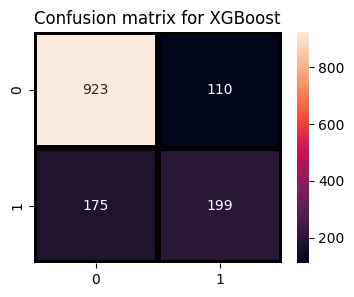

In [69]:
## Confusion matric for XGBoost
cnf = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cnf, annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Confusion matrix for XGBoost")

Score : 0.839304295158176


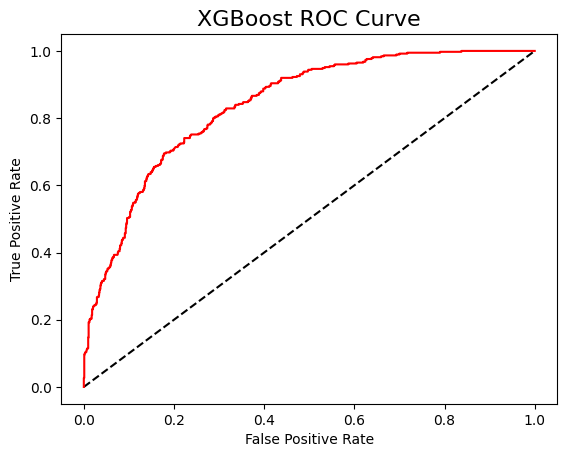

In [70]:
## Lets build ROC curve for Linear Regression
y_pred_prob = gb.predict_proba(X_test)[:,1] ## predicts probability of both calsses and positive one
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
score = metrics.roc_auc_score(y_test, y_pred_prob)
print(f"Score : {score}")
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve',fontsize=16)
plt.show();